In [1]:
from Nb_utils import *

NOTE! Installing ujson may make loading annotations faster.


/home/superorange5/.local/lib/python3.8/site-packages/torchvision/transforms/transforms.py:803: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


# 1. select dataset

In [2]:
DA_dataset = 'c2kb'  #skf2c
detector_name = 'ptda'  #'ptso'

## dataset setting

In [3]:
if DA_dataset == 'c2kb':
    ratio=1.2
    val_dataset_name = 'VOC2007_bddval1'   #'VOC2007_bddvalsmall'
    source_list =['kitti','cityscape']
    config_path = "configs/pt/final_c2b.yaml"
    if detector_name == 'ptda':
        model_c2b = load_TSmodel('c2b', 11999)
        model_k2b = load_TSmodel('k2b', 'final')
        model_list=[model_k2b,model_c2b]
    elif detector_name == 'ptso':
        model_c2b = load_TSmodel('c2b_source-only', 27999)
        model_k2b = load_TSmodel('k2b_source-only', 7999)
        model_list=[model_k2b,model_c2b]

elif DA_dataset=='skf2c':    
    val_dataset_name = 'VOC2007_cityval1'
    source_list =['sim10k','kitti','foggycityscape']
    ratio = 1.706
    config_path = "configs/pt/final_k2c.yaml"
    if detector_name == 'ptda':
        model_s2c = load_TSmodel('s2c', 15999)
        model_k2c = load_TSmodel('k2c', 19999)
        #model_f2c = get_model('f2c', 'final') #8class
        model_f2c = load_TSmodel('f2c_1class', 11999)
        model_list=[model_s2c,model_k2c,model_f2c]
    elif detector_name == 'ptso':
        model_s2c = load_TSmodel('s2c_source-only', 23999)
        model_k2c = load_TSmodel('k2c_source-only', 'final')
        model_f2c = load_TSmodel('f2c_source-only', 27999)
        model_list=[model_s2c,model_k2c,model_f2c]

        
# config
cfg = setup(config_path)

# load test data
test_data_loader = build_detection_test_loader(cfg, val_dataset_name)

# load annotations
data_annotation = DatasetCatalog.get(val_dataset_name)

output_csv_file = 'eval_metric_{}_{}_2023Apr.csv'.format(DA_dataset,detector_name)

keep_experiments/c2b/cfg.yaml
keep_experiments/c2b/model_0011999.pth
-------- pretrained model loaded ---------
-------- pretrained model loaded ---------
keep_experiments/k2b/cfg.yaml
keep_experiments/k2b/model_final.pth
-------- pretrained model loaded ---------
-------- pretrained model loaded ---------


# 2. Get results

## 2A.single image test

In [4]:
data_loader_iter = iter(test_data_loader)
test_data = data_loader_iter.next()

proposals_roih_multiple=[]
for model in model_list:
    proposals_roih_multiple.append(get_proposal_roih(test_data,model))

    #data_annotation[0]['annotations'][0]['bbox']
ma_gt, ma_src = get_match_array_all(proposals_roih_multiple, data_annotation[0]['annotations'],ratio)



In [ ]:
data_annotation[0]['annotations']

In [ ]:
proposals_roih_multiple[0]

In [ ]:
proposals_roih_multiple[0][0].get('scores')

In [ ]:
proposals_roih_multiple[0][0].get('pred_boxes')

In [ ]:
ma_src

### get TP FP

In [8]:
TP, TN_array  =get_TP(ma_gt,source_list)
#TP, TN1, TN2
FP_array = get_FP(ma_src,source_list)
# src1 FP1 FP2, src2 FP1 FP2

In [9]:
TP

16

In [10]:
TN_array

[1, 2]

In [11]:
FP_array

[[5, 9], [0, 8]]

## 2.B output results of all images

### save to eval_metricxxx.csv

In [4]:
eval_metric_summary(test_data_loader, data_annotation,model_list, source_list,
                    output_file = output_csv_file,ratio=ratio)

# 3. draw pie chart

## 3A draw previous generated result

In [25]:
input_file = output_csv_file


## 3B draw history

### 3B.a.ck2b

In [40]:
input_file = 'pseudo_label_analysis/PTDA/eval_metric_ck2b.csv'
#input_file = 'pseudo_label_analysis/source-only_PT/eval_metric_ck2b.csv'
#input_file = '../frcnn_detectron2/pseudo_label_analysis/frcnn/eval_metric_ck2b.csv'
DA_dataset = 'ck2b'
detector_name='ptda'

### b.skf2c

In [29]:
#input_file = 'pseudo_label_analysis/PTDA/eval_metric_sf2c.csv'

#input_file = 'eval_metric_skf2c.csv'
input_file = '../frcnn_detectron2/pseudo_label_analysis/frcnn/eval_metric_skf2c.csv'

DA_dataset = 'skf2c'
detector_name='frcnn'

## 3.2 draw

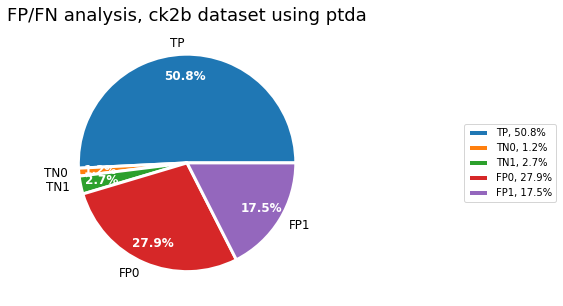

In [41]:
eval_result_to_draw = pd.read_csv(input_file)
labels = eval_result_to_draw.columns[1:]

pie_chart_list = gen_pie_chart_list(eval_result_to_draw)
draw_pie_chart(pie_chart_list, labels,DA_dataset,detector_name)

In [31]:
eval_result_to_draw

,filename,TP,TN0,TN1,TN2,FP0,FP1,FP2
0,frankfurt_000000_001236_leftImg8bit.jpg,17,0,0,1,1,2,2
1,frankfurt_000001_053102_leftImg8bit.jpg,3,0,0,0,5,11,4
2,frankfurt_000001_009854_leftImg8bit.jpg,16,0,1,0,3,1,0
3,frankfurt_000001_001464_leftImg8bit.jpg,0,2,0,0,15,7,14
4,frankfurt_000001_046126_leftImg8bit.jpg,2,0,3,0,2,21,0
...,...,...,...,...,...,...,...,...
487,lindau_000052_000019_leftImg8bit.jpg,0,0,0,1,5,1,0
488,lindau_000000_000019_leftImg8bit.jpg,12,0,0,1,0,2,0
489,lindau_000028_000019_leftImg8bit.jpg,5,0,0,0,2,0,0
490,lindau_000023_000019_leftImg8bit.jpg,0,2,0,0,2,0,8


# check count

In [56]:
#input_file = 'pseudo_label_analysis/PTDA/eval_metric_skf2c.csv'
#input_file = 'pseudo_label_analysis/source-only_PT/eval_metric_skf2c.csv'
#input_file = '../frcnn_detectron2/pseudo_label_analysis/frcnn/eval_metric_skf2c.csv'
input_file = 'eval_metric_sfk2c_frcnn_2023Apr.csv'
eval_result_to_draw = pd.read_csv(input_file)
eval_result_to_draw

,filename,TP,FN0,FN1,FN2,FP0,FP1,FP2
0,frankfurt_000000_001236_leftImg8bit.jpg,1,17,0,0,1,2,66
1,frankfurt_000001_053102_leftImg8bit.jpg,0,2,1,0,5,11,23
2,frankfurt_000001_009854_leftImg8bit.jpg,0,17,0,0,3,1,60
3,frankfurt_000001_001464_leftImg8bit.jpg,0,2,0,0,15,7,14
4,frankfurt_000001_046126_leftImg8bit.jpg,0,5,0,0,2,21,10
...,...,...,...,...,...,...,...,...
487,lindau_000052_000019_leftImg8bit.jpg,0,1,0,0,5,5,0
488,lindau_000000_000019_leftImg8bit.jpg,1,11,1,0,0,2,28
489,lindau_000028_000019_leftImg8bit.jpg,5,0,0,0,2,0,7
490,lindau_000023_000019_leftImg8bit.jpg,0,0,2,0,2,0,7


In [57]:
gen_pie_chart_list(eval_result_to_draw)

[398, 3418, 610, 241, 729.0, 1145.6666666666667, 5633.0]

In [58]:
eval_result_to_draw.sum(axis=0)

filename    frankfurt_000000_001236_leftImg8bit.jpgfrankfu...
TP                                                        398
FN0                                                      3418
FN1                                                       610
FN2                                                       241
FP0                                                      2187
FP1                                                      3437
FP2                                                     16899
dtype: object